### import libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### import dataset

In [ ]:
df = pd.read_csv('auto-mpg.data', sep = '\s+', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'car name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### dealing with missing values

In [ ]:
df['horsepower'].replace('?', np.nan, inplace = True)
df['horsepower'].fillna(df['horsepower'].median(), inplace = True)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce')
df['horsepower'] = df['horsepower'].fillna(-1).astype('float64')
df['car name'] = df['car name'].astype('string')
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    string 
dtypes: float64(5), int64(3), string(1)
memory usage: 28.1 KB


### X and y

In [ ]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 0:1].values

### train test splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### features scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

### train regressor model

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### predicting the result

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[15.03 15.  ]
 [17.56 20.2 ]
 [32.16 30.  ]
 [19.21 20.  ]
 [29.14 28.  ]
 [35.4  33.8 ]
 [24.25 26.  ]
 [26.54 24.  ]
 [24.91 18.  ]
 [20.79 20.2 ]
 [20.25 17.  ]
 [32.03 34.2 ]
 [18.39 18.5 ]
 [17.96 20.  ]
 [17.48 18.  ]
 [17.89 16.5 ]
 [24.88 27.9 ]
 [24.66 24.  ]
 [34.84 31.9 ]
 [16.6  15.  ]
 [29.38 33.5 ]
 [20.13 19.  ]
 [20.93 21.  ]
 [31.52 29.  ]
 [16.26 13.  ]
 [18.82 19.  ]
 [18.68 18.  ]
 [24.99 27.  ]
 [14.64 16.5 ]
 [27.64 27.4 ]
 [26.92 26.  ]
 [14.22 14.  ]
 [28.26 31.  ]
 [14.78 15.  ]
 [37.81 29.8 ]
 [18.93 18.  ]
 [23.44 24.  ]
 [25.42 28.  ]
 [29.79 27.2 ]
 [15.54 16.  ]
 [21.3  24.  ]
 [13.9  14.  ]
 [13.48 13.  ]
 [20.29 21.5 ]
 [29.41 26.  ]
 [23.63 22.  ]
 [17.2  17.  ]
 [15.55 15.  ]
 [16.88 15.  ]
 [24.11 26.  ]
 [32.6  31.5 ]
 [23.13 24.  ]
 [20.21 24.  ]
 [15.42 13.  ]
 [13.76 14.  ]
 [22.19 21.  ]
 [17.91 17.  ]
 [20.63 20.5 ]
 [18.28 18.1 ]
 [15.76 13.  ]
 [17.84 18.  ]
 [17.36 19.2 ]
 [21.45 19.1 ]
 [15.73 16.  ]
 [26.39 27.  ]
 [19.15 19.2 ]
 [30.36 32

### evaluation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8283292335713263

### visualization

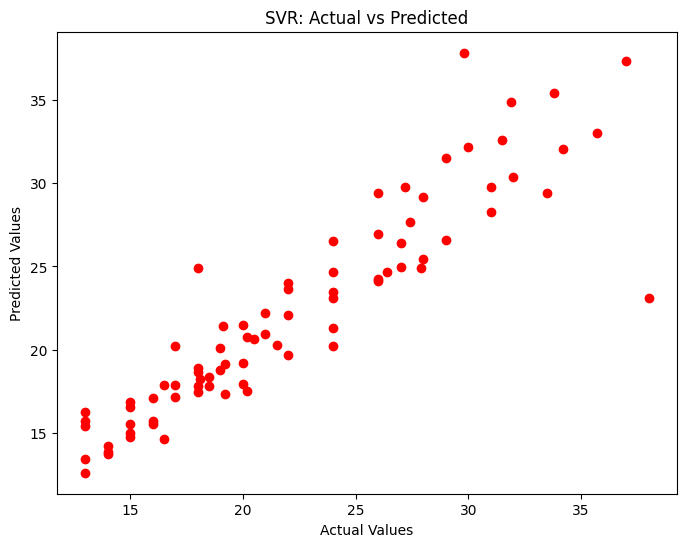

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()